### non-linear regression using scipy 

[2.80720814 1.24568448 0.44517316]


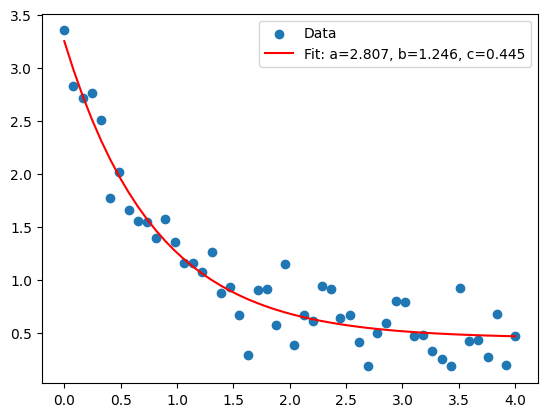

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the form of the function we want to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate some fake data to represent your real data
np.random.seed(0)
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

# Fit the function to the data
popt, pcov = curve_fit(func, xdata, ydata)

# Print the optimal parameters
print(popt)

# Plot the actual data
plt.scatter(xdata, ydata, label='Data')

# Plot the fit
plt.plot(xdata, func(xdata, *popt), 'r-', label='Fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.legend()
plt.show()


### scikit-learn for non-linear data

a: 1.7367269445704676
b: -0.7359318444674985


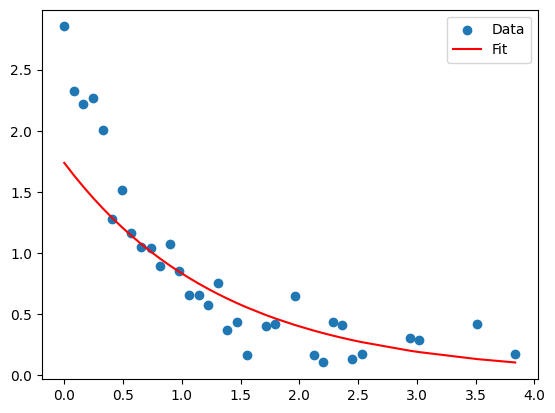

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate some fake data to represent your real data
np.random.seed(0)
xdata = np.linspace(0, 4, 50)
y = 2.5 * np.exp(-1.3 * xdata) 
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

# Remove any data points where ydata <= 0.1 to avoid NaN issues
xdata = xdata[ydata > 0.1]
ydata = ydata[ydata > 0.1]

# Fit the Linear Regression Model to the transformed data
model = LinearRegression()
model.fit(xdata.reshape(-1, 1), np.log(ydata)) 

# Print the optimal parameters
# model.coef_ is -b and np.exp(model.intercept_) is a in our original equation
print("a:", np.exp(model.intercept_))
print("b:", model.coef_[0])

# Plot the actual data
plt.scatter(xdata, ydata, label='Data')

# Plot the fit
plt.plot(xdata, (np.exp(model.intercept_) * np.exp(model.coef_[0] * xdata)), 'r-', label='Fit')

plt.legend()
plt.show()
